In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# **Explanation:**

**1.data.head():**

This command displays the first 5 rows of the dataset. It helps in quickly checking how the data is structured, what columns are present, and what the initial values look like.

**2.data.info():**

This function gives a summary of the dataset, including the number of non-null entries, the data types of each column, and the total number of rows. It is useful to check if there are any missing values or if the data types are correctly assigned.

**3.data.describe():**

This provides basic statistical details such as count, mean, standard deviation, minimum, maximum, and quartiles for numerical columns. It helps in understanding the distribution and spread of the data.

In [ ]:
# Load the dataset
file_path = '/content/Bitcoin BEP2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect its structure
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   Currency  1151 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.1+ KB


(         Date          Open          High           Low         Close  \
 0  2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
 1  2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
 2  2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
 3  2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
 4  2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   
 
      Volume Currency  
 0  952850.0      USD  
 1  131077.0      USD  
 2   83052.0      USD  
 3   76227.0      USD  
 4   84485.0      USD  ,
 None,
                Open          High           Low         Close        Volume
 count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
 mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
 std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
 min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
 25%     9706.758

# **Explanation:**

1. **Data Loading**:
   - The dataset is loaded from the file `'Bitcoin BEP2.csv'` using `pd.read_csv()` into a DataFrame called `bitcoin_data`.

2. **Preprocessing**:
   - The `Date` column is converted to a numeric feature using `pd.to_datetime()` and `map(pd.Timestamp.toordinal)`. This converts the date into an ordinal format (numeric representation) that can be used in machine learning models.
   
3. **Feature Selection**:
   - The feature variables (`X`) are selected as `['Date', 'Open', 'High', 'Low', 'Volume']` to predict the target variable `y`, which is the `Close` price.
   
4. **Train-Test Split**:
   - The data is split into training and testing sets using `train_test_split()`. 80% of the data is used for training, and 20% is used for testing. The `random_state=42` ensures reproducibility of the results.

5. **Model Training**:
   - A linear regression model is instantiated and trained using the `fit()` function on the training data (`X_train`, `y_train`).

6. **Prediction**:
   - After the model is trained, predictions are made on the test set (`X_test`) using `model.predict()`. The predicted values are stored in `y_pred`.

7. **Evaluation**:
   - The model is evaluated using:
     - **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual values. A lower value indicates a better model.
     - **R-squared (R2)**: Indicates how well the model explains the variance in the target variable. A value close to 1 means the model explains most of the variance.

### Output:
- Print the **Mean Squared Error (MSE)** and **R-squared (R2)** of the model to help assess its performance.



In [ ]:
# Load the dataset
file_path = '/content/Bitcoin BEP2.csv'  # Replace with the correct file path
bitcoin_data = pd.read_csv(file_path)

# Preprocessing: Convert 'Date' to a numeric feature and drop non-numeric data
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data['Date'] = bitcoin_data['Date'].map(pd.Timestamp.toordinal)

# Select features and target variable
X = bitcoin_data[['Date', 'Open', 'High', 'Low', 'Volume']]
y = bitcoin_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 4925325.9548485475
R-squared (R2): 0.9841694148416834


# **Explanation:**


1. **Getting the Most Recent Data:**
   - The last available row of data from the dataset is extracted using `iloc[-1]`. This row contains the most recent information regarding the Bitcoin market.

2. **Preparing Data for Prediction:**
   - A specific date (June 3, 2023) is chosen for prediction. This date is assigned using `pd.Timestamp('2023-06-03')`.

3. **Creating a Dictionary for Prediction Data:**
   - A dictionary is created to hold the data needed for prediction on the selected date. The dictionary contains the following:
     - The date (June 3, 2023)
     - The `Open`, `High`, `Low`, and `Volume` values from the most recent row of data (`latest_data`).

4. **Converting Date to Numeric Format:**
   - The `Date` is converted to a numeric format using `.toordinal()`. This step is necessary because machine learning models cannot process date values directly, and converting it to ordinal format (an integer) allows the model to use it as input.

5. **Creating a DataFrame for the Prediction:**
   - A new DataFrame is created from the dictionary. This DataFrame will be used as input for the prediction.

6. **Predicting the Closing Price:**
   - The trained linear regression model is used to predict the closing price for June 3, 2023, based on the provided data (date, open, high, low, volume).
   - The predicted closing price is then printed to the output.



In [ ]:
# Get the most recent row from the dataset
latest_data = bitcoin_data.iloc[-1]

# Prepare the data for the prediction of January 1, 2023
next_year_date = pd.Timestamp('2023-06-03')

# Prepare the data for the prediction (use the last known values)
next_year_data = {
    'Date': next_year_date,  # Set the date to January 1, 2023
    'Open': latest_data['Open'],
    'High': latest_data['High'],
    'Low': latest_data['Low'],
    'Volume': latest_data['Volume']
}

# Convert the next year's date into a numeric value (ordinal format)
next_year_data['Date'] = next_year_data['Date'].toordinal()

# Create a DataFrame for the next year's prediction
next_year_df = pd.DataFrame([next_year_data])

# Predict the closing price for January 1, 2023
predicted_closing_price = model.predict(next_year_df[['Date', 'Open', 'High', 'Low', 'Volume']])[0]

print(f"Predicted Closing Price for June 3, 2023: {predicted_closing_price}")


Predicted Closing Price for June 3, 2023: 21457.736840054626


# **Explanation:**

1. **Figure Setup:**
   - `plt.figure(figsize=(10, 6))`: This command sets the size of the plot to 10 inches wide and 6 inches tall, providing a clear and spacious visual for analysis.

2. **Scatter Plot:**
   - `plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')`:
     - This command creates a scatter plot where each point represents a test sample. The x-axis represents the **actual Bitcoin prices** (`y_test`), and the y-axis represents the **predicted Bitcoin prices** (`y_pred`) from the model.
     - The `alpha=0.6` parameter adds transparency to the points, making the plot clearer if there is overlapping data.
     - The `label` argument is used to define the legend label for this data series, in this case, "Predicted vs Actual."

3. **45-Degree Line (Perfect Prediction Line):**
   - `plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')`:
     - This command draws a red line representing a perfect prediction where the predicted price matches the actual price. The line is plotted from the minimum to the maximum values of the actual prices (`y_test`), creating a diagonal line.
     - The `color='red'` parameter makes the line red, and `linewidth=2` makes it thicker for better visibility.
     - The `label` argument labels this line as "Perfect Prediction" for the legend.

4. **Labels and Title:**
   - `plt.xlabel('Actual Prices')`: This sets the label for the x-axis to "Actual Prices."
   - `plt.ylabel('Predicted Prices')`: This sets the label for the y-axis to "Predicted Prices."
   - `plt.title('Actual vs Predicted Bitcoin Prices')`: This gives the plot a title, which helps in identifying the purpose of the plot (comparing actual vs predicted Bitcoin prices).

5. **Legend:**
   - `plt.legend()`: This displays the legend on the plot, identifying the data points (Predicted vs Actual) and the red line (Perfect Prediction).

6. **Display Plot:**
   - `plt.show()`: This command renders the plot so that it can be displayed on the screen.

### Purpose:
This plot visually compares the actual Bitcoin closing prices against the predicted prices from the linear regression model. The closer the points are to the red line, the more accurate the model's predictions. A perfect model would have all points lying on the red line, indicating that the predicted values match the actual values exactly.

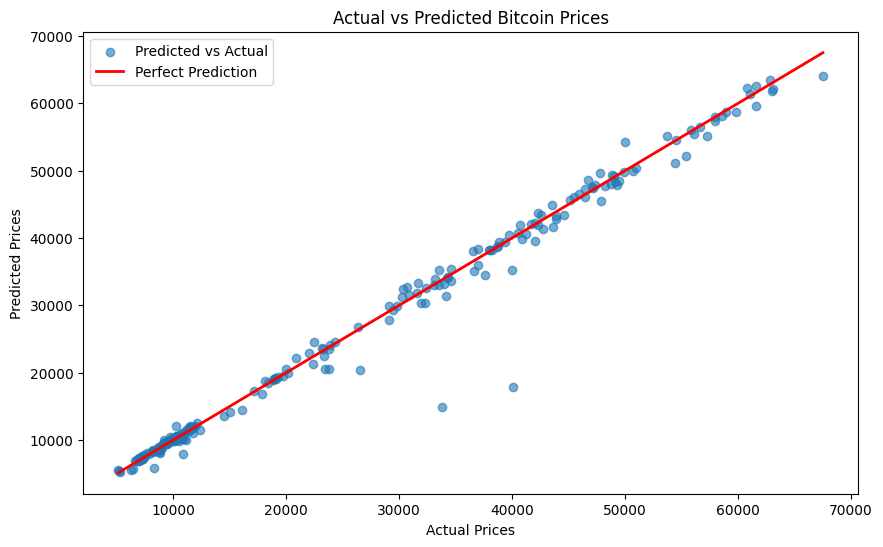

In [ ]:
# Plotting actual vs predicted prices for the test set
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')

# Plot the 45-degree line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.legend()

# Show the plot
plt.show()